# **PROJECT : Analyzing the Income Dataset**

### Library Importation

In [1]:
# For Data Manipulation and Analysis:
import numpy as np
import pandas as pd

# For Data visualization:
import matplotlib.pyplot as plt
import seaborn as sns

# For Machine Learning and Model building:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

### Data Importation

In [2]:
# loading/importing the dataset into the jupyter working environment:
project_file = "income_data.csv"

df = pd.read_csv(project_file)   # turning the dataset into a pandas dataframe

### Exploratory Data Analysis (EDA)

In [3]:
# inspecting few rows of the dataset:

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
# Revealing the shape and the size of the dataset:

print(f"The shape of the dataset is: {df.shape}\n")

print(f"The size of the dataset is: {df.size}")

The shape of the dataset is: (48842, 15)

The size of the dataset is: 732630


In [5]:
# Exploring the dataset to fully understand its state and structure:

print(df.info())   # Extracting a concise information about the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.9+ MB
None


In [6]:
# Displaying a summary statistics about the dataset.

display(df.describe().T)   # transposing the statistics table for a better readability

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
education-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


In [7]:
# checking the feature names:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [8]:
# Identifyimg the numerical and the categorical variables in the dataset:

num_var = df.select_dtypes(include = ['number']).columns.tolist()

cat_var = df.select_dtypes(include = ['object']).columns.tolist()

print(f"These are the Numerical Variables:\n {num_var}\n")
print(f"These are the Categorical Variables:\n {cat_var}")

These are the Numerical Variables:
 ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

These are the Categorical Variables:
 ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']


In [9]:
# Reviewing the datatypes of each column in the dataset:

print(df.dtypes)

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object


#### A random check on the categorical variable for better understanding

In [10]:
# exploring the different categories and their total
df['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
?                    1836
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [11]:
df['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
?                    1843
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [12]:
df['native-country'].value_counts()

United-States                 43832
Mexico                          951
?                               583
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

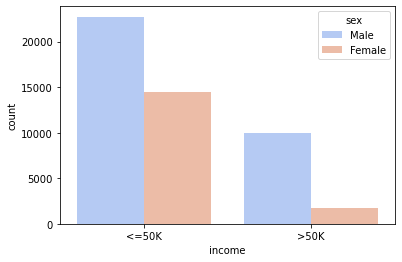

In [13]:
# display the income distribution by sex:
sns.countplot(df['income'], palette='coolwarm', hue='sex', data=df);

In [14]:
# Filling the missing category names with the mode of the column:

df['workclass'] = df['workclass'].replace('?', 'Private')
df['occupation'] = df['occupation'].replace('?', 'Prof-specialty')
df['native-country'] = df['native-country'].replace('?', 'United-States')

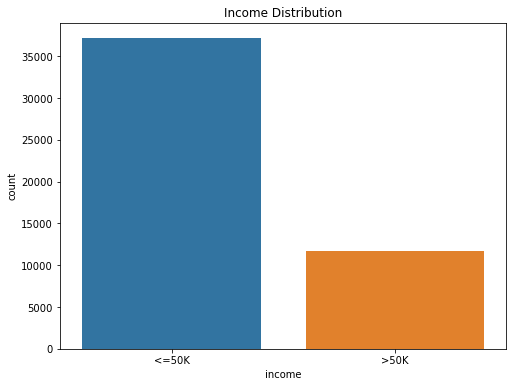

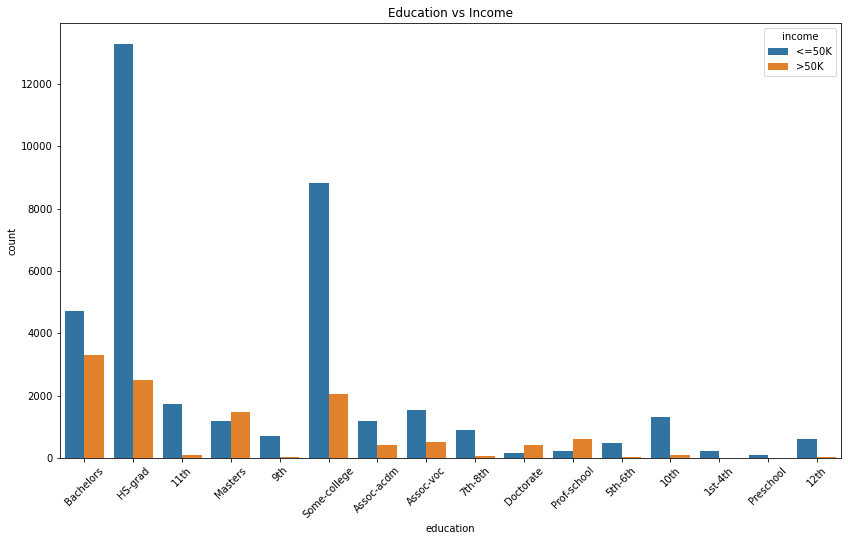

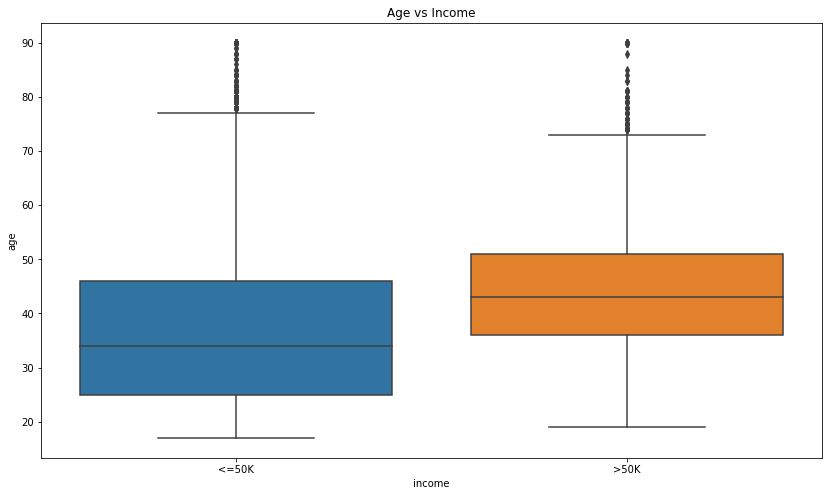

In [15]:
#  Distribution of income
plt.figure(figsize=(8, 6))
sns.countplot(x='income', data=df)
plt.title('Income Distribution')
plt.show()

# Relationship between education and income
plt.figure(figsize=(14, 8))
sns.countplot(x='education', hue='income', data=df)
plt.title('Education vs Income')
plt.xticks(rotation=45)
plt.show()

# Relationship between age and income
plt.figure(figsize=(14, 8))
sns.boxplot(x='income', y='age', data=df)
plt.title('Age vs Income')
plt.show()


### Data Pre-processing and Feature Engineering

In [16]:
# Checking the columns names:
        
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [17]:
# Renaming the column names for easy typing when referencing them later:

df = df.rename(columns={'education-num':'edu_num', 'marital-status':'marital',
                       'capital-gain':'gain', 'capital-loss':'loss',
                       'hours-per-week':'hrs\wk', 'native-country':'nativity'})
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'edu_num', 'marital',
       'occupation', 'relationship', 'race', 'sex', 'gain', 'loss', 'hrs\wk',
       'nativity', 'income'],
      dtype='object')

In [18]:
# getting the value counts:

df.workclass.value_counts()

Private             35742
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

### **Reducing the number of categories within specific feature to reduce the possibility of overfitting**

In [19]:
# Education category:
df['education'] = df['education'].replace({'Preschool':'pry school', 
                                           '1st-4th':'pry school', 
                                           '5th-6th':'pry school', 
                                           '7th-8th':'pry school', 
                                           '9th':'pry school', 
                                           '10th':'pry school', 
                                           '11th':'pry school', 
                                           '12th': 'pry school', 
                                           'HS-grad': 'high school', 
                                           'Assoc-voc': 'undergrad', 
                                           'Assoc-acdm': 'undergrad', 
                                           'Prof-school': 'undergrad', 
                                           'Some-college': 'undergrad', 
                                           'Bachelors' : 'grad', 
                                           'Masters' : 'post grad', 
                                           'Doctorate' : 'doc'})

# marital status category:
df['marital'] = df['marital'].replace({'Never-married': 'single', 
                                       'Married-civ-spouse': 'married', 
                                       'Married-AF-spouse': 'married', 
                                       'Married-spouse-absent': 'other', 
                                       'Divorced': 'other', 
                                       'Widowed': 'other'})

# income category:
df['income'] = df['income'].replace({'<=50K': 0, '>50K': 1})

In [20]:
df.education.value_counts()

high school    15784
undergrad      15374
grad            8025
pry school      6408
post grad       2657
doc              594
Name: education, dtype: int64

In [21]:
# computing the correlation matrix:
corr_matrix = df.corr()

corr_matrix   # displaying the corelation matrix

,age,fnlwgt,edu_num,gain,loss,hrs\wk,income
age,1.000000,-0.076628,0.030940,0.077229,0.056944,0.071558,0.230369
fnlwgt,-0.076628,1.000000,-0.038761,-0.003706,-0.004366,-0.013519,-0.006339
edu_num,0.030940,-0.038761,1.000000,0.125146,0.080972,0.143689,0.332613
gain,0.077229,-0.003706,0.125146,1.000000,-0.031441,0.082157,0.223013
loss,0.056944,-0.004366,0.080972,-0.031441,1.000000,0.054467,0.147554
hrs\wk,0.071558,-0.013519,0.143689,0.082157,0.054467,1.000000,0.227687
income,0.230369,-0.006339,0.332613,0.223013,0.147554,0.227687,1.000000


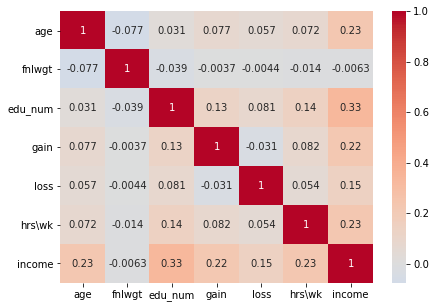

In [22]:
# visualizing the correlation matrix:
plt.figure(figsize=(7, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2g', center=0);

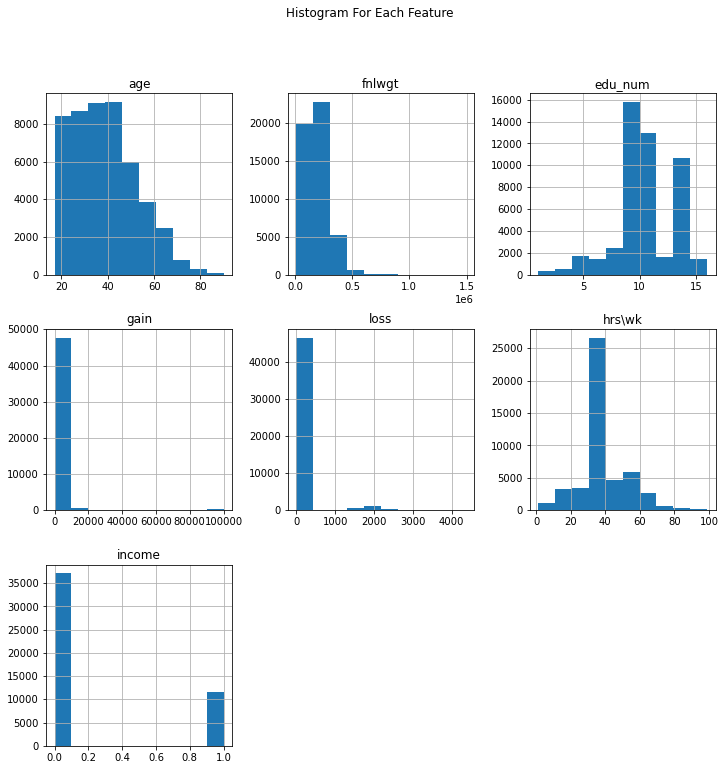

In [23]:
# ploting histogram to visualize the correlation of each numeric feature:

df.hist(figsize=(12,12), layout=(3,3), sharex=False);
plt.suptitle('Histogram For Each Feature')
plt.show()

Text(0.5, 1.0, 'Box Plot For Each Feature')

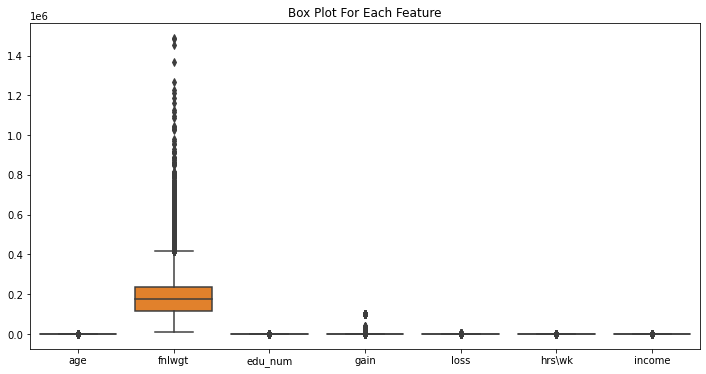

In [24]:
# plotting box plot to spot the outliers:

plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title('Box Plot For Each Feature')

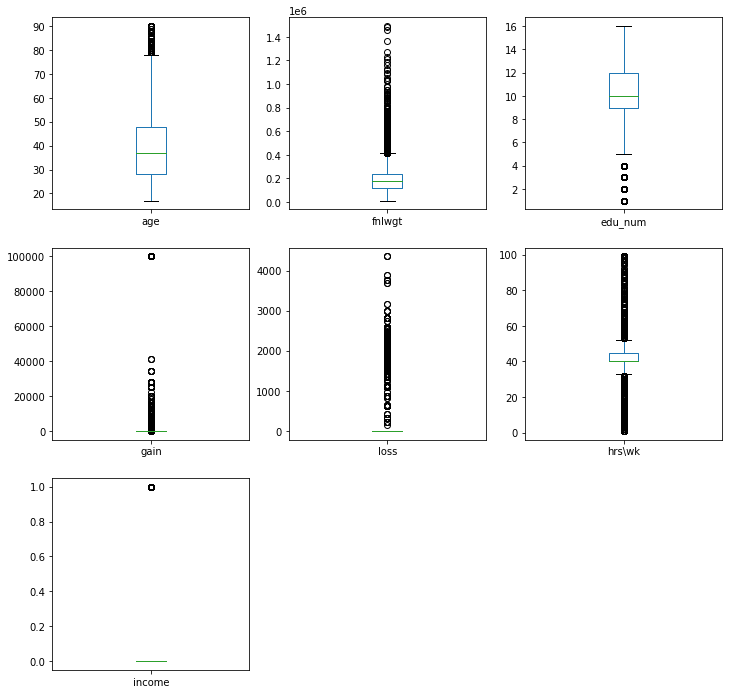

In [25]:
# box plot showing outliers:

df.plot(kind='box', figsize=(12,12), layout=(3,3), sharex=False, subplots=True);

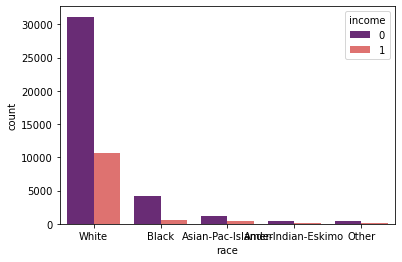

In [26]:
# countplot showing relationship between race and income:

sns.countplot(df['race'], hue='income', data=df, palette='magma');

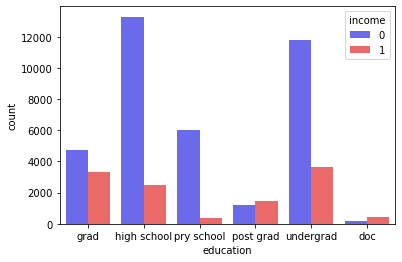

In [27]:
# countplot showing relationship between education and income:

sns.countplot(df['education'], hue='income', data=df, palette='seismic');

In [28]:
# Checking for missing values:

print(df.isnull().sum())
print(f"\nThere are {df.isnull().sum().sum()} missing values in the dataset")  

age               0
workclass       963
fnlwgt            0
education         0
edu_num           0
marital           0
occupation      966
relationship      0
race              0
sex               0
gain              0
loss              0
hrs\wk            0
nativity        274
income            0
dtype: int64

There are 2203 missing values in the dataset


In [29]:
# Creating an instance for SimpleImputer:
imputer = SimpleImputer(strategy = 'most_frequent')

imputer

SimpleImputer(strategy='most_frequent')

In [30]:
# Removing the missing values:

imputer = SimpleImputer(strategy = 'most_frequent')

# creating variable for the features to be imputed:
cols_to_impute = ["workclass", "occupation", "nativity"]

# imputing the features with their mode respectively: 
df[cols_to_impute] = imputer.fit_transform(df[cols_to_impute])

# Creating a dataframe from the imputed_data:

imputed_df = pd.DataFrame(df[cols_to_impute], columns = cols_to_impute)

# Replacing the original features with the new imputed_data:
df[cols_to_impute] = imputed_df

In [31]:
# displaying the resulting dataframe, free of missing values:
display(df)

,age,workclass,fnlwgt,education,edu_num,marital,occupation,relationship,race,sex,gain,loss,hrs\wk,nativity,income
0,39,State-gov,77516,grad,13,single,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,grad,13,married,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,high school,9,other,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,pry school,7,married,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,grad,13,married,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,grad,13,other,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,0
48838,64,Private,321403,high school,9,other,Prof-specialty,Other-relative,Black,Male,0,0,40,United-States,0
48839,38,Private,374983,grad,13,married,Prof-specialty,Husband,White,Male,0,0,50,United-States,0
48840,44,Private,83891,grad,13,other,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,0


In [32]:
# Checking for duplicate values:

dup_val = df.duplicated().sum()
if dup_val == 0:
    print("There are no duplicate values in the dataset")
else:
    print(f"There are {df.duplicated().sum()} duplicate values in the dataset")   

There are 53 duplicate values in the dataset


In [33]:
# Removing the duplicate values:
df = df.drop_duplicates()

# checking the new shape:
print(f"The new shape after the duplicate values have been removed is: {df.shape}")

The new shape after the duplicate values have been removed is: (48789, 15)


In [34]:
df.duplicated().sum()

0

In [35]:
data_state = df.isnull().sum().sum() + df.duplicated().sum()

if data_state == 0:
    print("Dataset is clean and ready for training")
else:
    print("Dataset is still dirty and not ready")

Dataset is clean and ready for training


### **Insights:**

1. Exploring the dataset I found out that the dataset is a csv file containing census data on the income of the populace.


2. The income distribution ploted above reveals that the dataset in not balanced. because we have more people in the population whose income is less than or equal to 50k per year.


3. The dataset is not clean at all. Using the value_counts() method on the categorical variables, I discovered that some of the categories have null  column name represented by '?' . I fixed the issue by filling them with the mode of the column.


4. The dataset have 2203 missing values and 53 duplicate values in total.


5. There are outliers in the dataset but the machine algorithm deployed in this project will take care of them as Random Forest model is not too sensitive or easily influenced by it.


6. The correlation matrix reveals that the features are not too correlated with one another. but there are some that are strongly correlated with the income.

## **Dropping irrelevant features**

### The fnlwgt column and the education_num column must be dropped

### Reason:
1. The fnlwgt which is also called the final weight is used to calculate the weighted average of a particular underrepresented group in the population during census, and it does not directly influence a person's income.

2. While I was exploring the dataset, I discovered that the "education-num" feature is the the encoded version of the education feature. Since the "education" feature itself has been encoded, there is no need to have two different columns with the same values. hence, the need to drop the education_num feature. I did this to reduce the possibility of having overfitting problem later.

In [36]:
# cheking the dataset
df.head()

,age,workclass,fnlwgt,education,edu_num,marital,occupation,relationship,race,sex,gain,loss,hrs\wk,nativity,income
0,39,State-gov,77516,grad,13,single,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,grad,13,married,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,high school,9,other,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,pry school,7,married,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,grad,13,married,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [37]:
# revealing the shape:
df.shape

(48789, 15)

In [38]:
# dropping the irrelevant features:
cols_to_drop = ["fnlwgt", "edu_num"]

df = df.drop(columns = cols_to_drop)

In [39]:
# recheking the dataset after dropping the irrelevant features
df.head()
df.columns

Index(['age', 'workclass', 'education', 'marital', 'occupation',
       'relationship', 'race', 'sex', 'gain', 'loss', 'hrs\wk', 'nativity',
       'income'],
      dtype='object')

In [40]:
# Labeling Encoding of the categorical variables:

le = LabelEncoder()

df['workclass'] = le.fit_transform(df['workclass'])
df['education'] = le.fit_transform(df['education'])
df['marital'] = le.fit_transform(df['marital'])
df['occupation'] = le.fit_transform(df['occupation'])
df['relationship'] = le.fit_transform(df['relationship'])
df['race'] = le.fit_transform(df['race'])
df['sex'] = le.fit_transform(df['sex'])
df['nativity'] = le.fit_transform(df['nativity'])

In [41]:
# viewing the resulting dataframe:
df.head()

,age,workclass,education,marital,occupation,relationship,race,sex,gain,loss,hrs\wk,nativity,income
0,39,6,1,3,0,1,4,1,2174,0,40,38,0
1,50,5,1,1,3,0,4,1,0,0,13,38,0
2,38,3,2,2,5,1,4,1,0,0,40,38,0
3,53,3,4,1,5,0,2,1,0,0,40,38,0
4,28,3,1,1,9,5,2,0,0,0,40,4,0


In [42]:
# seperating the dataset into feature(X) and the target(y):
X = df.drop(["income"], axis=1)

y = df["income"]

In [43]:
# scaling the dataset
scaler = StandardScaler()
scaler.fit_transform(X)

scaled_data = scaler.transform(X)

display("Original data:", X.head())
display("Scaled data:", scaled_data)

'Original data:'

,age,workclass,education,marital,occupation,relationship,race,sex,gain,loss,hrs\wk,nativity
0,39,6,1,3,0,1,4,1,2174,0,40,38
1,50,5,1,1,3,0,4,1,0,0,13,38
2,38,3,2,2,5,1,4,1,0,0,40,38
3,53,3,4,1,5,0,2,1,0,0,40,38
4,28,3,1,1,9,5,2,0,0,0,40,4


'Scaled data:'

array([[ 0.02530302,  2.60968126, -1.31741463, ..., -0.21725056,
        -0.03436654,  0.25944955],
       [ 0.82773742,  1.70987957, -1.31741463, ..., -0.21725056,
        -2.21306345,  0.25944955],
       [-0.04764557, -0.08972382, -0.6817363 , ..., -0.21725056,
        -0.03436654,  0.25944955],
       ...,
       [-0.04764557, -0.08972382, -1.31741463, ..., -0.21725056,
         0.77255824,  0.25944955],
       [ 0.39004593, -0.08972382, -1.31741463, ..., -0.21725056,
        -0.03436654,  0.25944955],
       [-0.26649131,  0.81007788, -1.31741463, ..., -0.21725056,
         1.57948303,  0.25944955]])

In [44]:
# splitting the dataset into the train data and the test data:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                   random_state = 42)

In [45]:
# Building a logistic model:
log = LogisticRegression(max_iter=10000)
log_mod = log.fit(X_train, y_train)

log_pred = log_mod.predict(X_test)

#Evaluate the model
accuracy_log = accuracy_score(y_test, log_pred)
conf_matrix_log = confusion_matrix(y_test, log_pred)
class_report_log = classification_report(y_test, log_pred)

display(f"Logistic Regression Accuracy: {accuracy_log}")
print("Confusion Matrix:")
display(conf_matrix_log)
print("Classification Report:")
print(class_report_log)

'Logistic Regression Accuracy: 0.8004714080754253'

Confusion Matrix:


array([[7004,  352],
       [1595,  807]], dtype=int64)

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.95      0.88      7356
           1       0.70      0.34      0.45      2402

    accuracy                           0.80      9758
   macro avg       0.76      0.64      0.67      9758
weighted avg       0.79      0.80      0.77      9758



In [46]:
# Building the model
rfc = RandomForestClassifier()
rfc_model = rfc.fit(X_train, y_train)

rfc_pred = rfc_model.predict(X_test)

#Evaluate the model
accuracy_rfc = accuracy_score(y_test, rfc_pred)
conf_matrix_rfc = confusion_matrix(y_test, rfc_pred)
class_report_rfc = classification_report(y_test, rfc_pred)


display(f"Accuracy: {accuracy_rfc}")
print("Confusion Matrix:")
display(conf_matrix_rfc)
print("Classification Report:")
print(class_report_rfc)

'Accuracy: 0.8420782947325272'

Confusion Matrix:


array([[6768,  588],
       [ 953, 1449]], dtype=int64)

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      7356
           1       0.71      0.60      0.65      2402

    accuracy                           0.84      9758
   macro avg       0.79      0.76      0.78      9758
weighted avg       0.84      0.84      0.84      9758



In [47]:
# computing the confusion matrix:
cm = confusion_matrix(y_test, rfc_pred)

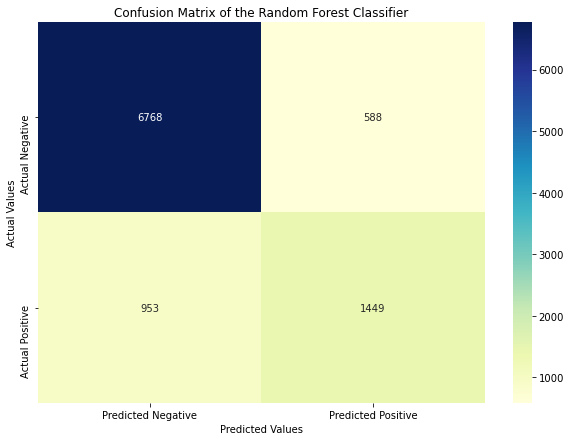

In [48]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix of the Random Forest Classifier')
plt.show()

In [49]:
# Training the dataset using the K-Nearest Neighbors model:
knn = KNeighborsClassifier(n_neighbors=4)

knn.fit(X_train, y_train)  # training the data.

knn_pred = knn.predict(X_test)  # prediction is being done by the model.

In [50]:
# Training the dataset using the Decision Tree model:
dt = DecisionTreeClassifier(max_depth=5)

dt.fit(X_train, y_train)   # the training of the data is ongoing here.

dt_pred = dt.predict(X_test)   # And prediction is made here.

In [51]:
# Training the dataset using the Random Forest model:
rfc = RandomForestClassifier(max_depth=5)

rfc_model = rfc.fit(X_train, y_train)

rfc_pred = rfc_model.predict(X_test)

In [52]:
# Training the dataset using the Support Vector Machine model:
svm = SVC(kernel='rbf', C=1.0, tol=0.001, shrinking=True, cache_size=200) 

svm.fit(X_train, y_train)  # the data is being trained.

svm_pred= svm.predict(X_test)  # the model is predicting.

In [53]:
# Calculating the accuracy score of each model:
log_accuracy = accuracy_score(y_test, log_pred)
knn_accuracy = accuracy_score(y_test, knn_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)
dt_accuracy = accuracy_score(y_test, dt_pred)
rfc_accuracy = accuracy_score(y_test, rfc_pred)

# Printing the accuracy score of each model:
print(f"Logistic Regression Accuracy: {round(log_accuracy, 2)}")
print(f"K-Nearest Neighbors Accuracy: {round(knn_accuracy, 2)}")
print(f"Support Vector Machine Accuracy: {round(svm_accuracy, 2)}")
print(f"Decision Tree Accuracy: {round(dt_accuracy, 2)}")
print(f"Random Forest Accuracy: {round(rfc_accuracy, 2)}")

Logistic Regression Accuracy: 0.8
K-Nearest Neighbors Accuracy: 0.83
Support Vector Machine Accuracy: 0.8
Decision Tree Accuracy: 0.83
Random Forest Accuracy: 0.83


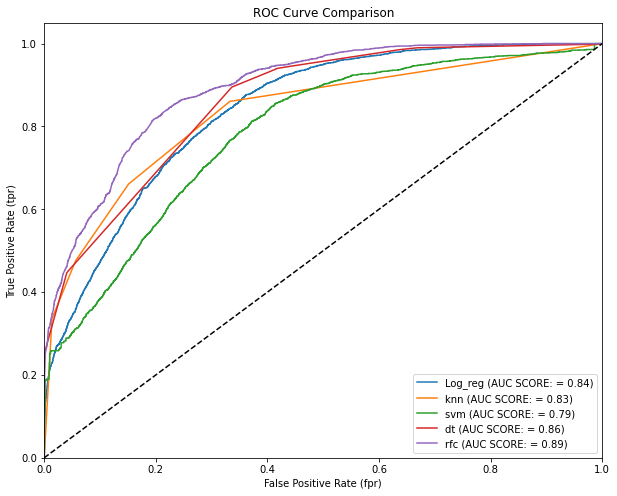

In [54]:
# Plotting the roc_curve for all the models on a single figure:

# Initialize classifiers
classifiers = {
    'Log_reg': LogisticRegression(max_iter=10000),
    'knn': KNeighborsClassifier(n_neighbors=4),
    'svm': SVC(probability=True, kernel='rbf', C=1.0),
    'dt': DecisionTreeClassifier(max_depth=5),
    'rfc': RandomForestClassifier(max_depth=5)
}

plt.figure(figsize=(10, 8))

# Iterating over classifiers:
for name, clf in classifiers.items():
    # Fit the model
    clf.fit(X_train, y_train)
    
    # Getting the predicted probabilities:
    y_probs = clf.predict_proba(X_test)[:, 1]
    
    # Calculating the ROC curve:
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)
    
    # Calculating the AUC score:
    auc_score = roc_auc_score(y_test, y_probs)
    
    # Plotting the ROC curve:
    plt.plot(fpr, tpr, label=f'{name} (AUC SCORE: = {auc_score:.2f})')

# Setting the plot for better visualization:
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (fpr)')
plt.ylabel('True Positive Rate (tpr)')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()

## **Model Evaluation**

Because of the inbalance in our dataset, which makes accuracy score not to be trusted. We resort to using F1-score and the AUC score to evaluate the performance of each model used. Random Forest Model turns out to be the best performing model with the weighted average F1-score of 84% and AUC score of 89%. This actually makes our model to be a very good model.

## **Summary and Recomendation**

From the EDA previously done, we discover that there is an imbalance in the income of the people. Whereby we have more men in the labour force than women.
And also a large percentage of younger people earns more than $50K per year. Also people with higher education tends to earn more than those with less education. Findings from the EDA also shows that features like final weight, native country, education num do not directly affect the income level.

I will recommend that more relevant features should be added in order to increase the performance of this model. To further boost the efficiency of this model, we can employ the use of ensemble techniques like Xgboost and hyperparameters tuning can be used to fine tuned or optimize the performance of the model.